In [24]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

from scipy import stats
from scipy.stats import norm, skew 

# visualization
import seaborn as sns;
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.ensemble import RandomForestClassifier


#### Import data files and view the shape of the files

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')
traintest = [train, test]
all_data = pd.concat((train, test)).reset_index(drop = True)
## Dropping the target variable. 
all_data.drop(['SalePrice'], axis = 1, inplace = True)


pd.set_option('display.max_rows', 500)
train.dtypes
all_data.shape

C:\Users\tester\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  after removing the cwd from sys.path.


(2919, 80)

In [39]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 80)


C:\Users\tester\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  after removing the cwd from sys.path.


### Framework
---
#### 1. Define the Problem
#### 2. Gather and Organize Data
#### 3. Perform Exploratory Analysis
#### 4. Model Data
#### 5. Validate model 
#### 6. Review and Optimize Results

## Analysis of Data Features 

** MSSubClass: ** Identifies the type of dwelling involved in the sale
              
This is a categorical data feature which contains descriptions of the type of dwelling on the property. This feature represents a combination of different data features that have different defining characteristics such as year built, attic, garage, basement, stories, yard size, etc. 

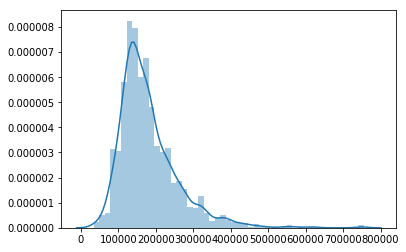

In [3]:
x = np.random.normal(train.SalePrice)
sns.distplot(x)

In [4]:
#skewness and kurtosis
print("Skewness: %f" % train.SalePrice.skew())
print("Kurtosis: %f" % train.SalePrice.kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [5]:
(train.corr()**2)["SalePrice"].sort_values(ascending = False)[1:]

OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.123763
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
Id               0.000480
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePrice, dtype: float64

In [6]:
def customized_scatterplot(y, x):
        ## Sizing the plot. 
    sns.set_style('darkgrid')
    plt.subplots(figsize = (12,8))
    ## Plotting target variable with predictor variable(OverallQual)
    sns.scatterplot(y = y, x = x);

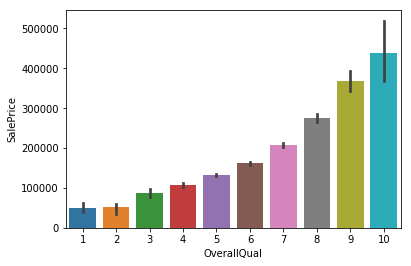

In [7]:
sns.barplot(x = 'OverallQual',y= 'SalePrice', data = train)

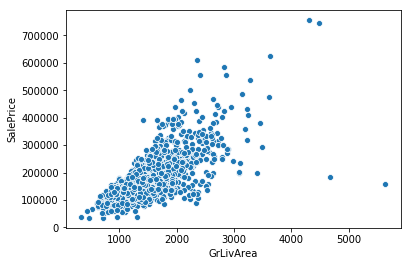

In [8]:
sns.scatterplot(x = 'GrLivArea',y= 'SalePrice', data = train)

Remove outliers from GrLivArea Plot

In [9]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

Check plot to make sure outliers are removed from dataframe

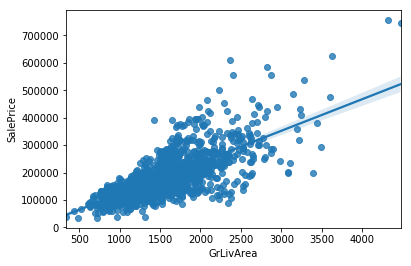

In [10]:
sns.regplot(x = 'GrLivArea',y= 'SalePrice', data = train)

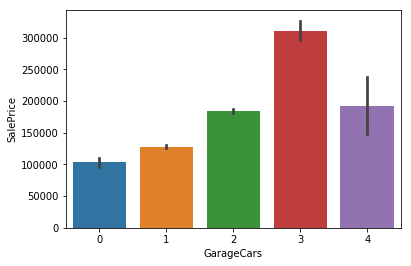

In [11]:
sns.barplot(x = 'GarageCars',y= 'SalePrice', data = train)

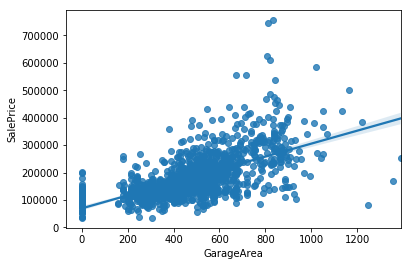

In [12]:
sns.regplot(x = 'GarageArea',y= 'SalePrice', data = train)

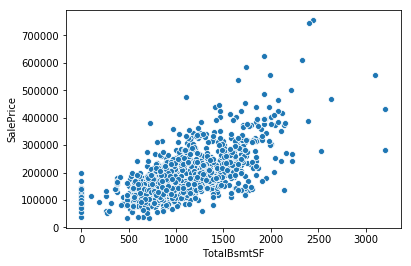

In [13]:
sns.scatterplot(x = 'TotalBsmtSF',y = 'SalePrice', data = train)

Remove Outlier from TotalBsmtSF

In [14]:
train = train.drop(train[(train['TotalBsmtSF']>4000) & (train['SalePrice']<200000)].index)

Check plot to make sure outlier is removed

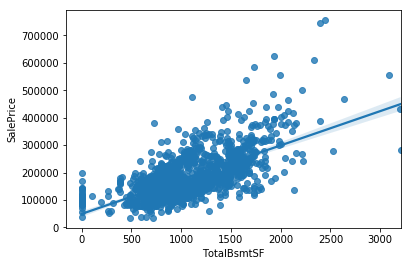

In [15]:
sns.regplot(x = 'TotalBsmtSF',y = 'SalePrice', data = train)

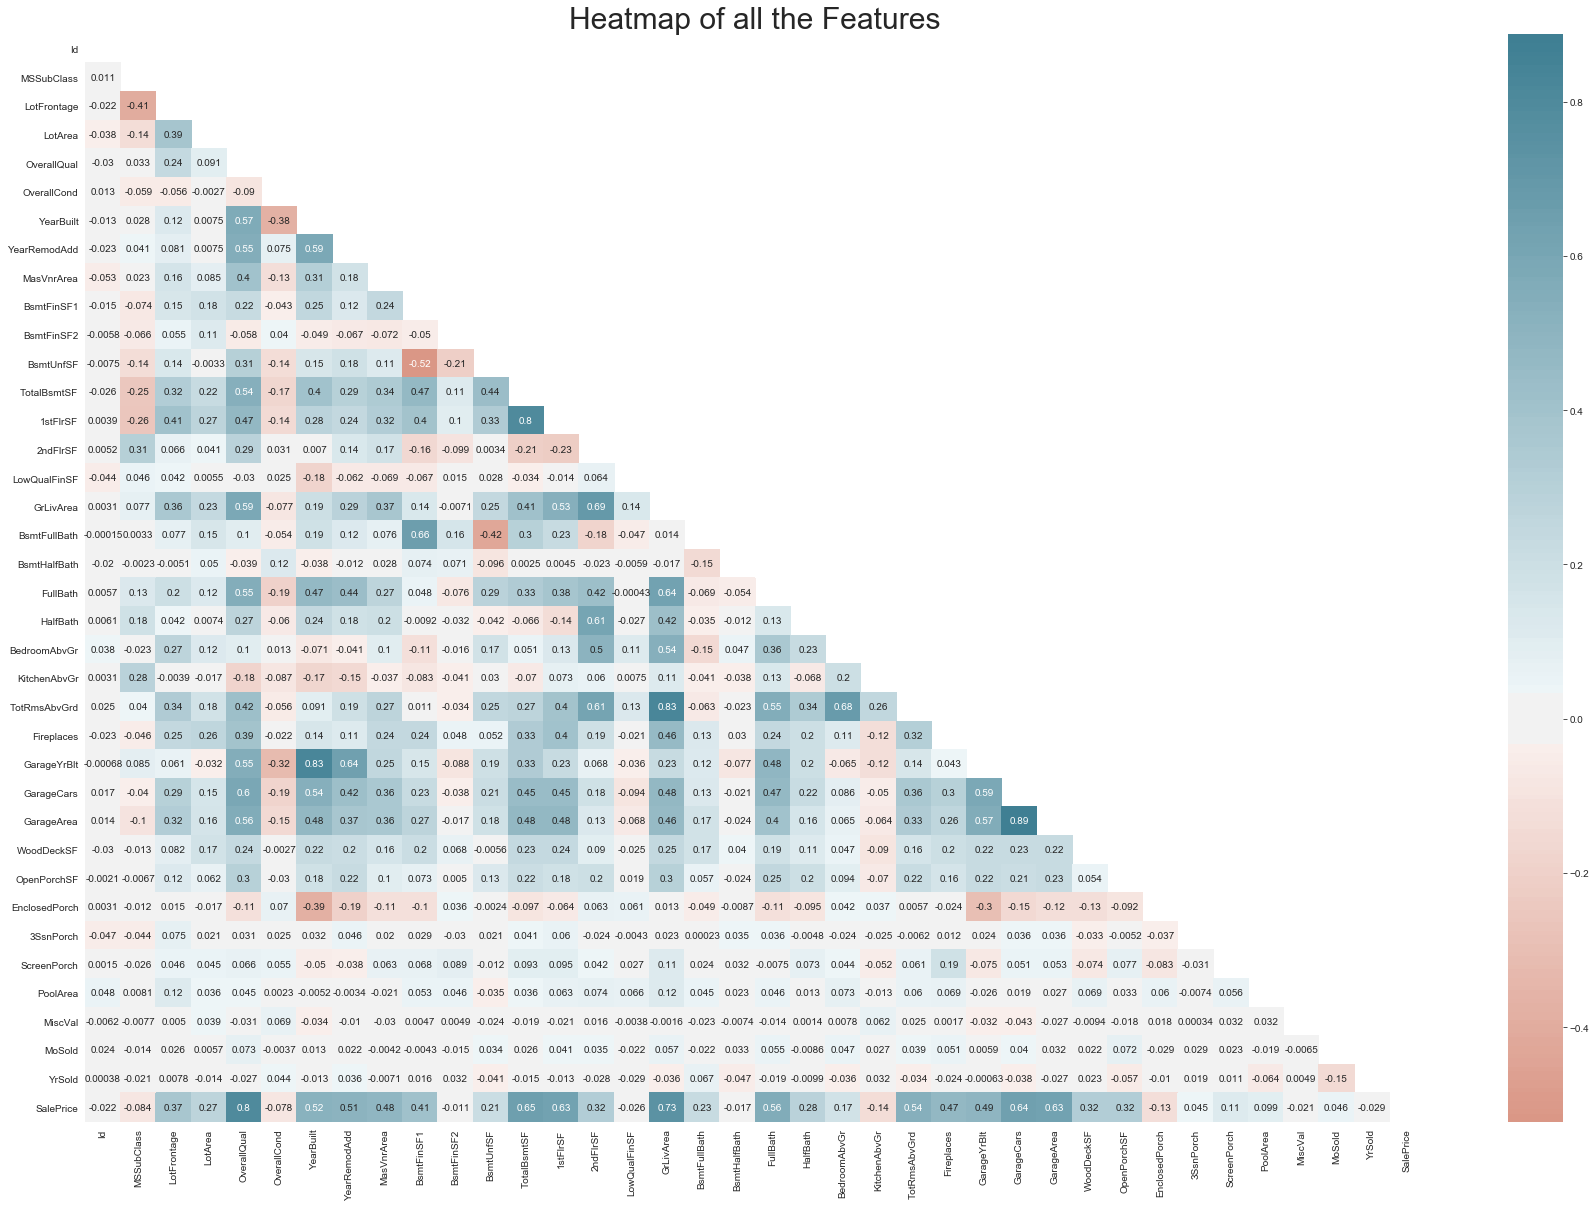

In [16]:


sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(train.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
           );
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);

Convert MSSubClass to categorical data type

In [ ]:
train.MSSubClass = train.MSSubClass.astype(str)
train.MSSubClass.dtype

In [ ]:
result = train.groupby(['MSSubClass'])['SalePrice'].aggregate(np.mean).reset_index().sort_values('SalePrice')
result

We see that on average the most expensive type of dwelling is a "2-story 1946 & newer" and the least expensive dwelling is "1-story 1946 & older". based on these results we can infer that year built and number of stories will have a factor on saleprice. Our next step is to determine correlations between different data features.

In [ ]:
sns.barplot(x = 'MSSubClass',y= 'SalePrice', data = train, order= result['MSSubClass'])


In [ ]:
result_2 = train.groupby(['MSSubClass'])['SalePrice'].aggregate(np.median).reset_index().sort_values('SalePrice')
result_2


In [ ]:
sns.barplot(x = 'MSSubClass',y= 'SalePrice', data = train, order= result_2['MSSubClass'])

#### Now that I have analyzed and converted the MSSubClass data feature, I will convert other features that should be categorical rather than numerical 

In [ ]:
#function converts numerical data feature(int or float) to categorical data feature(object)
def num_to_cat(x):
    train[x] = train[x].astype(str)
    test[x] = test[x].astype(str)

In [ ]:
cat_to_num('YearBuilt')
cat_to_num('YrSold')
cat_to_num('OverallCond')
cat_to_num('TotRmsAbvGrd')
cat_to_num('MoSold')
train.MoSold.dtype

### First determine missing values and fill in with the appropriate values for the data feature

In [ ]:
for dataset in traintest:
    missing_values = dataset.isnull().sum()
    print(missing_values)

### Data features with missing values 
---
Most of the features with missing values are considered optional features of houses that can be added and/or replaced to increase the value of properties. Here is a list of the features with missing values and their definitions from the data documentation 

1. **Lot Frontage** is defined by the data documentation as "Linear feet of street connected to property" indicating that some houses may have property connection with a street. We will replace values of NA with the value of 0 to indicate that there is no amount of street connected to the property

2. **Alley** is defined by the data documentation as "Type of alley access to property" with 3 categorical values with NA = "No alley access", Grvl = "gravel" and Pave = "Paved". We will replace these with the values of 0 = No alley access, 1 = Paved and 2 = Gravel

3. **Bsmt... Features** for all the basement features we have similar missing values as the value of NA means the house has no basement and therefore none of the conditions can be evaluated.

4. **MasVnrType and MasVnrArea** These features represent the type and amount of masonry used on the house. Some houses do not have any masonry so they are given the value of None

5. **Electrical** is a categorical feature and only contains 1 missing value. We might decide to use the most common electrical value to fill in the missing value or create a new value to replace the missing value with

6. **FireplaceQu** represents the quality of the fireplace. Houses with no fireplace are giving a value of NA

7. **Garage... Features** all garage features will have a value of NA for houses with no Garage

8. **PoolQC** represents the quality of the pool. Houses with no pool are given a value of NA

9. **Fence** represents the quality of fence on the property. Houses with no fence are given a value of NA

10. **MiscFeature** represents any feature not covered in other categories. this feature may be removed as it has a large amount NA values which we will have trouble replacing accurately and depending on its values correlation with other features. For example, a house with a 2nd garage is likely to also be a large house which may be a better representation of its sale price

Convert Lot Frontage NaN values to 0

In [ ]:
for dataset in traintest:
    dataset.LotFrontage = dataset['LotFrontage'].fillna(0)

Replace categorical values with ordinal values as representation for Alley column

In [ ]:
for dataset in traintest:
    dataset.Alley = dataset.Alley.fillna(0)
    dataset.Alley = dataset.Alley.replace( {'Pave': 1, 'Grvl': 2})

In [ ]:
for dataset in traintest:
    dataset.MasVnrType = dataset.MasVnrType.fillna('None')
    dataset.MasVnrArea = dataset.MasVnrArea.fillna(0)

In [ ]:
for dataset in traintest:
    dataset.BsmtQual = dataset.BsmtQual.fillna('NA')
    dataset.BsmtCond = dataset.BsmtCond.fillna('NA')
    dataset.BsmtExposure = dataset.BsmtExposure.fillna('NA')
    dataset.BsmtFinType1 = dataset.BsmtFinType1.fillna('NA')
    dataset.BsmtFinType2 = dataset.BsmtFinType2.fillna('NA')

In [ ]:
for dataset in traintest:
    dataset.FireplaceQu = dataset.FireplaceQu.fillna('NA')

In [ ]:
test.Utilities
null_data = test['Utilities'][test['Utilities'].isnull()]
null_data

pd.set_option('display.max_columns', 500)
test.loc[[455]]

In [ ]:
for dataset in traintest:
    dataset.GarageType = dataset.GarageType.fillna('NA')
    dataset.GarageFinish = dataset.GarageFinish.fillna('NA')
    dataset.GarageYrBlt = dataset.GarageYrBlt.fillna('NA')
    dataset.GarageQual = dataset.GarageQual.fillna('NA')
    dataset.GarageCond = dataset.GarageCond.fillna('NA')

In [ ]:
for dataset in traintest:
    dataset.PoolQC = dataset.PoolQC.fillna('NA')

In [ ]:
for dataset in traintest:
    dataset.Fence = dataset.Fence.fillna('NA')
    dataset.MiscFeature = dataset.MiscFeature.fillna('NA')


In [ ]:
for dataset in traintest:
    dataset = dataset.isnull().sum()

Since there are only a few missing values left over several different columns. It will be tedius to fix them individually which also leaves room for a biased estimate so it will be best to just drop the rest of the missing values.

In [ ]:
for dataset in traintest:
    dataset = dataset.dropna()
    print(dataset.isnull().sum())

In [18]:
(train.corr()**2)["SalePrice"].sort_values(ascending = False)[1:]

OverallQual      0.633257
GrLivArea        0.540178
TotalBsmtSF      0.424000
GarageCars       0.410941
1stFlrSF         0.398831
GarageArea       0.395915
FullBath         0.316029
TotRmsAbvGrd     0.289195
YearBuilt        0.274166
YearRemodAdd     0.257776
GarageYrBlt      0.237321
MasVnrArea       0.233018
Fireplaces       0.220771
BsmtFinSF1       0.167595
LotFrontage      0.137333
WoodDeckSF       0.105468
OpenPorchSF      0.103132
2ndFlrSF         0.102740
HalfBath         0.080992
LotArea          0.071920
BsmtFullBath     0.052193
BsmtUnfSF        0.045993
BedroomAbvGr     0.028306
KitchenAbvGr     0.018481
EnclosedPorch    0.016550
ScreenPorch      0.012413
PoolArea         0.009898
MSSubClass       0.007102
OverallCond      0.006076
MoSold           0.002127
3SsnPorch        0.001986
YrSold           0.000834
LowQualFinSF     0.000657
Id               0.000470
MiscVal          0.000450
BsmtHalfBath     0.000285
BsmtFinSF2       0.000130
Name: SalePrice, dtype: float64

#### Plot initial distribution and probability plot of target variable 


 mu = 180932.92 and sigma = 79467.79



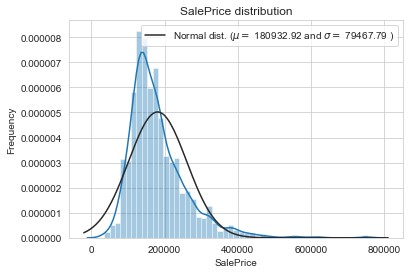

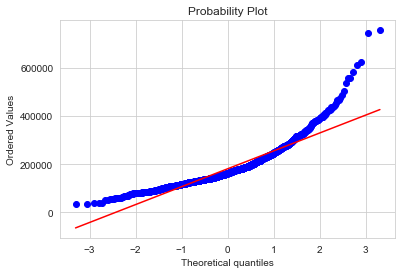

In [25]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

#### Plot distribution and probability plot of log-transformation of target variable


 mu = 12.02 and sigma = 0.40



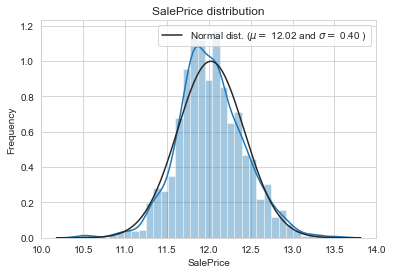

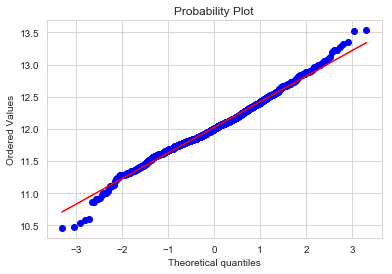

In [26]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()